In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [2]:
# Variables
sRate = 44100 # sample rate in Hertz
freq1 = 50.0 # frequency of first sine wave
#freq2 = 100.0 # frequency of second sine wave
amplitude1 = 10 # amplitude of first wave
#amplitude2 = 5 # amplitude of second wave
numPeriods = 10 # number of periods of the sine waves
numSamples = sRate * numPeriods # total number of samples

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [4]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)

In [5]:
x

array([  0.00000000e+00,   2.26757884e-05,   4.53515768e-05, ...,
         9.99995465e+00,   9.99997732e+00,   1.00000000e+01])

In [6]:
len(x)

441000

In [7]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)

In [8]:
sampled_f1 = [f1(i) for i in x]

In [10]:
len(sampled_f1)

441000

(-15, 15)

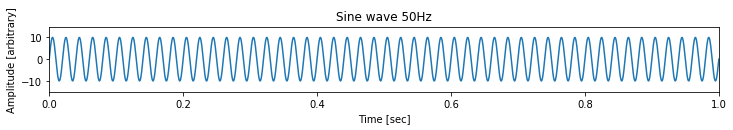

In [22]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, sampled_f1)
plt.title('Sine wave 50Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 1)
plt.ylim(-15, 15)

In [12]:
fft_output = np.fft.rfft(sampled_f1)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

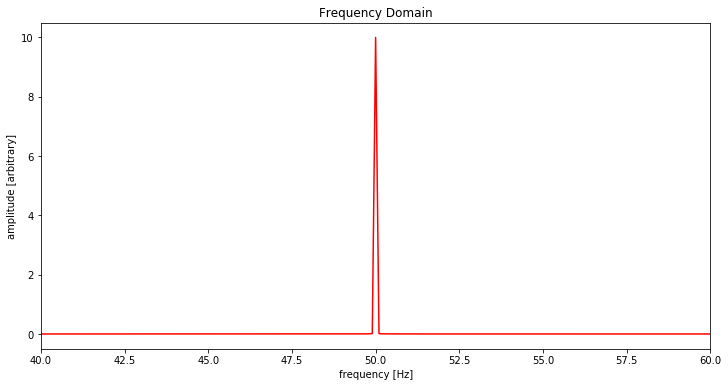

In [24]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(40,60)
plt.plot(frequencies, magnitude, 'r')


In [14]:
len(sampled_f1)

441000

In [16]:
len(magnitude)

220501

In [18]:
len(frequencies)

220501

In [20]:
print ('Opening data files...')
dataFile = open('sine50Hz.dat', 'wt')  # To be run through Fortran code. Has amplitudes only.
td_dataFile = open('sine50Hz_time_domain.dat', 'wt')  # Has time domain amplitude and time data
fd_dataFile = open('sine50Hz_freq_domain.dat', 'wt')  # Has freq domain amplitude and corrected FFT frequencies (bins)

print ('Writing data files...')
np.savetxt(dataFile, sampled_f1, fmt='%10.10f', delimiter=' ', newline='\n')
np.savetxt(td_dataFile, np.column_stack([sampled_f1, x]), fmt='%10.10f', newline='\n')
np.savetxt(fd_dataFile, np.column_stack([magnitude, frequencies]), fmt='%10.10f', newline='\n')

Opening data files...
Writing data files...
